# Particle Swarm Optimization Exercise


**Introduction:**

You and your friends head to the city centre of Osnabrück for a boozy evening. You are new to the city or have been prevented from getting to know it better. That's why you set out for your own pub rally. Your destination? To find the cheapest beer in Osnabrück.

Unfortunately, you are all somewhat chaotic and forget to arrange a meeting point. You find yourselves (randomly) scattered around the bars at a certain time. You call up the rest and decide to still pursue your goal. 
So everyone of your group checks the beer in the bar they are currently in. After the check is done, you call each other and exchange your position and your further route!

In [5]:
from typing import List
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [4]:
!curl -o bar_icon.png https://cdn-icons-png.flaticon.com/512/8/8136.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  8362  100  8362    0     0  69663      0 --:--:-- --:--:-- --:--:-- 70268


Since your knowledge of Osnabrück's bar scene is a bit rusty, you have written down a list of bars, or more precisely: their names and coordinates.

In [11]:
bar_list = [
    {"name": "Heimelich", "cords": (1.6500, 1.7)},
    {"name": "Countdown", "cords":  (1.650, 3.1)},
    {"name": "Dirty + Dancing", "cords":  (1.650, 4.45)},
    {"name": "Barouque", "cords":  (3.15, 1.7)},
    {"name": "Red Shemrock", "cords": (3.15, 3.1)},
    {"name": "Polly Esther", "cords": (3.15, 4.45)},
    {"name": "Grüner Jäger", "cords": (2.66836204, 0.7764)},
    {"name": "Sonder Bar", "cords": (1.12318829, 3.4303)},
    {"name": "Sausalitos", "cords": (2.23407559, 3.01186056)},
    {"name": "Tiefenrausch", "cords": (2.00195754, 0.69233427)},
    {"name": "No. 16", "cords": (3.20475467, 2.13985942)}
]

You also get a cost function. So when you explore the bar with your group, you find out the price of the beer using the coordinates of the location. Funnily, the prices of adjacent bars are always similar, so we see almost a continuous function. 


In [19]:
def cost_func(pos_y: int, pos_x: int) -> float:
    """ Calculates the respective cost value for the
    given coordinates

    :param pos_y: Y-Position of the particle
    :param pos_x: Y-Position of the particle
    
    :returns the cost given the coordinates
    """

    # hand crafted function mapping the cost for beer to coordinates
    return (pos_x - 3.14)**2 + (pos_y - 2.72)**2 + np.sin(3 * pos_x + 1.41) + np.sin(4 * pos_y - 1.73)

The functions below are auxiliary functions that are used for the graphical representation - nothing needs to be changed here.

In [13]:
def getImage(path, zoom=0.08):
    return OffsetImage(plt.imread(path), zoom=zoom)


def vis_func(x_swarm: List[int], y_swarm: List[int], cost_func, iter_index: int):

    # initalize the meshgrid
    x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
    z = cost_func(x, y)

    # Contour plot: With the global minimum showed as "X" on the plot
    x_min = x.ravel()[z.argmin()]
    y_min = y.ravel()[z.argmin()]

    plt.figure()

    fig, ax = plt.subplots(figsize=(16,12))

    # visualize the plot regions
    ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)

    # plot the global minimum and the particle positions
    ax.plot([x_min], [y_min], marker='x', markersize=10, color="white")
    contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
    ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")

    bar_cords = [bar.get('cords') for bar in bar_list]
    barY, barX = list(zip(*bar_cords))

    for y0, x0 in zip(barY, barX):
        ab = AnnotationBbox(
            getImage('bar_icon.png'), 
            (x0, y0), 
            frameon=False, 
            box_alignment=(0.39, -0.1)
        )

        ab.set_alpha(0.05)
        ab.set_zorder(1)
        ax.add_artist(ab)

    bar_names = [bar.get('name') for bar in bar_list]

    for i, txt in enumerate(bar_names):
        plt.annotate(txt, (barX[i], barY[i]), xytext = (barX[i], barY[i]-0.05))
        
    ax.scatter(x_swarm, y_swarm, zorder=10)
    

    plt.axis('off')
    plt.show()


Here you can see an example of how the search space with the bars looks like - the swarm is just some random particles for visualization:

<Figure size 432x288 with 0 Axes>

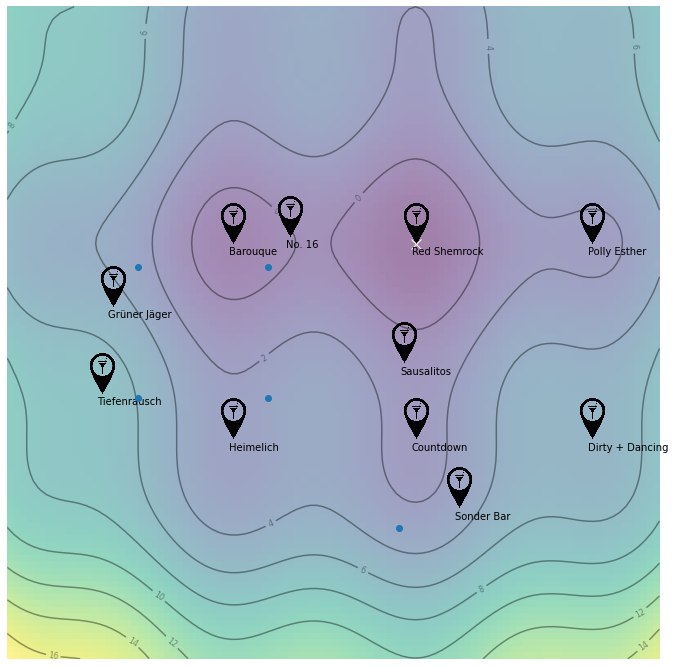

In [14]:
vis_func([1,1,2,3,2],[2,3,3,1,2], cost_func, 1)

**TASK 1: Create Particles**

Here you are to implement the representation of your friends and yourself. Your group works like the particles that were introduced in the presentation.
More precisely, you have to create the functions *evaluate()*, *update_velocity()* and *update_position()*. The rest of the class is already given.





*   evaluate()
    - Calculate the error of the person with the help of the cost function.
    - If the newly calculated error is an individual best, update the position and error!

*   update_velocity()
    - Update the velocity attribute with the formula given in the lecture.
    - therefore, initialize inertia, the cognitive constant and the social constant
    - also, create two random numbers r1 and r2 between 0 and 1

*   update_position()
    - update your friends' position with their newly gained velocity
    - we already provide you with some code that makes sure the new position is still inside the boundaries of the map 




In [32]:
class Particle:

    def __init__(self, start_pos: np.ndarray) -> None:
        """ Initalize the particle position, velocity and the errors.
        Also set the best position and error. 
        
        :param start_pos: The inital position
        """
        # particle position, velocity and error
        self.pos = start_pos
        self.v = np.random.uniform(-1, 1, 2)
        self.err = -1 # --------> I think this refers to (self.best_pos - self.pos)

        # best individual position and error
        self.best_pos = None
        self.best_err = -1 # --------> I think this is refers to (global_best - self.pos)
        
        # set hyperparameters -----> might need some adjusting (no info on which values to choose is provided)
        self.theta = 1
        self.alpha = 1
        self.beta = 1


    def evaluate(self, cost_func) -> None:
        """ Evaluate current fitness and update best pos and error
        if current ones are better.

        :param cost_func: function to evaluate the fitness
        """
        #---START CODE HERE---
        
        # This code assumes that we want to minimize the cost function (and thus the fitness because it refers to the price)
        
        # update self.pos
        if self.best_pos == None:
            self.best_pos = self.pos
            
        elif cost_func(self.pos) < cost_func(self.best_pos):
            self.best_pos = self.pos
        
        # update self.err
        self.err = self.best_pos - self.pos
        

    def update_velocity(self, best_pos_swarm: np.ndarray):
        """Update new particle velocity
        
        :param best_pos_g: best position from the swarm
        """
        #---START CODE HERE---
        
        # create random vector [x,y] in range (0,1) ----> Shape might be off when calculating stuff but cant test that yet
        eps_1 = np.random.rand(1,2)
        eps_2 = np.random.rand(1,2)
        
        # update velocity -----> Value of global_best is calculated in task 2
        self.v = (self.theta*self.v) + (self.alpha * eps_1[0] * (global_best - self.pos)) + (self.beta * eps_2[0] * (self.err))

    def update_position(self, bounds: List[int]):
        """Update the particle position based off new velocity updates.

        :param bounds: list defining the edges of the map
        """
        #---START CODE HERE---
        
        #update position
        self.pos = self.pos + self.vel

        # adjust maximum position if necessary
        self.pos[0] = max(bounds[0][0], min(self.pos[0], bounds[0][1]))
        self.pos[1] = max(bounds[1][0], min(self.pos[1], bounds[1][1]))

**TASK 2.1: Finish the PSO Algorithm**

Now it's finally time to swarm out!

In this task, you will have to establish the swarm and create the *__call__* function. Look at the comments for some guidance!


In [ ]:
class PSO():
    def __init__(self, cost_func, pos: np.ndarray, bounds: List[int], n_particles: int, vis_func):
        """ Initalize the Particle swarm optimization and all necessary parameters

        :param cost_func: 
        :param pos
        
        """

        self.bounds = bounds
        self.cost_func = cost_func
        # intialize best global err and pos 
        self.err_best_swarm = -1                   
        self.pos_best_swarm = []                   
        
        # establish the swarm
        self.swarm = None #---YOUR CODE HERE---
        self.vis_func = vis_func


    def __call__(self, n_iterations):
        """ Function to run the particle swarm optimization
        
        """
        # run for n iterations
        for iter_idx in range(n_iterations):

            #---START CODE HERE---

            # cycle through particles in swarm and evaluate fitness

            # determine if current particle is the best (globally)

            # cycle through swarm and update velocities and position

            # (optionally) visualize partial result


        # visualize results
        x_swarm, y_swarm = zip(*[list(particle.pos) for particle in self.swarm])
        self.vis_func(x_swarm, y_swarm, self.cost_func, iter_idx)


**TASK 2.2: Run the PSO algorithm**

In [ ]:
num_of_people = 10 # change that value and see what happens

pso = PSO(
    cost_func, 
    np.asarray([2.3, 2.3]),
    [[0, 5], [0, 5]],
    num_of_people,
    vis_func
)

Try it out:

<Figure size 432x288 with 0 Axes>

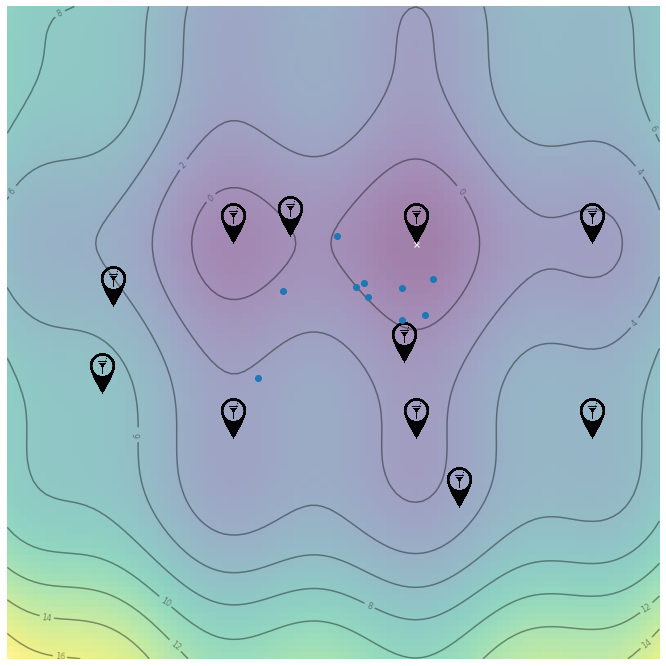

In [ ]:
num_iterations = 2 # change that value and see what happens
pso(num_iterations)

**TASK 3: Write up**

Try going out with bigger friend groups or even alone. Play around with some other values such as inertia. Write your findings down here such that next time you know exactly how to find the cheapest beer in Osnabrück in the fastest way possible!

And if you are really motivated: how about having a look at the cost function - maybe cheap beer is not the only thing we are interested in when searching for a bar. Cost functions could also represent loudness of the bar ....